Sources
https://www.seai.ie/sites/default/files/publications/Median-costs-of-individual-energy-upgrades.pdf
"The values for windows and doors were estimated based on market trends and common costs in Ireland, as SEAI does not explicitly provide median costs for these upgrades in the available ""Median Costs of Individual Energy Upgrades"" PDF. Look at market rates in Ireland:
Typical window replacement costs in Ireland range from €400-€900 per window depending on size, type (double/triple glazing), and material.
Door replacement costs vary based on insulation quality, typically €2,000-€4,000 per energy-efficient door."

# Energy Efficiency & Consumption Analysis.

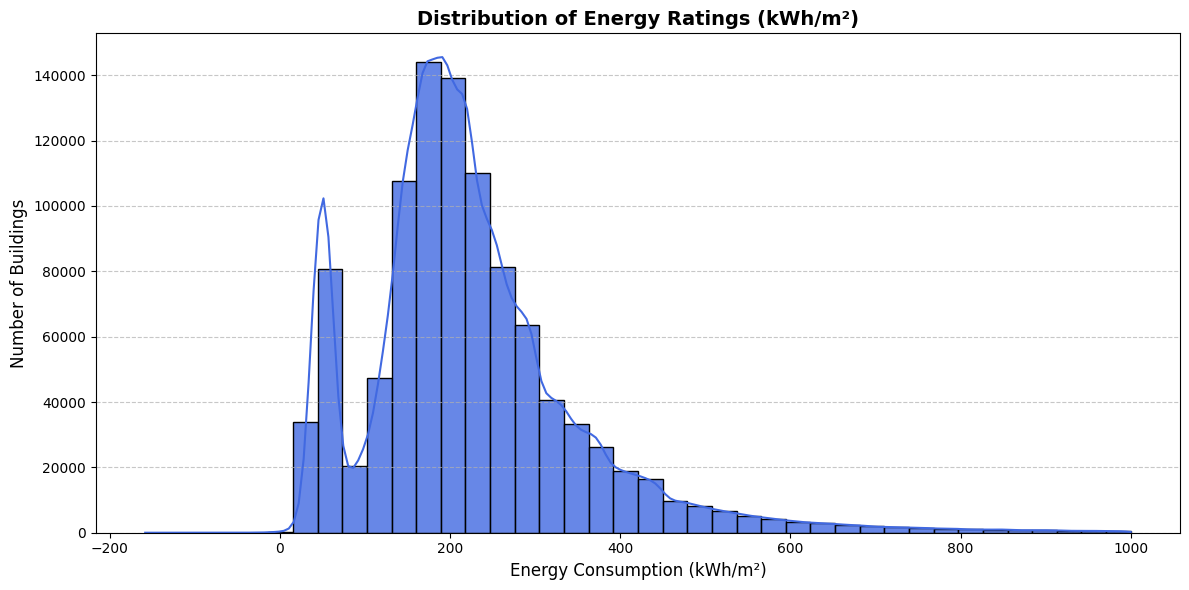

C:\Users\User\AppData\Local\Temp\ipykernel_92712\2524139254.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=building_avg.index, y=building_avg.values, palette="viridis")


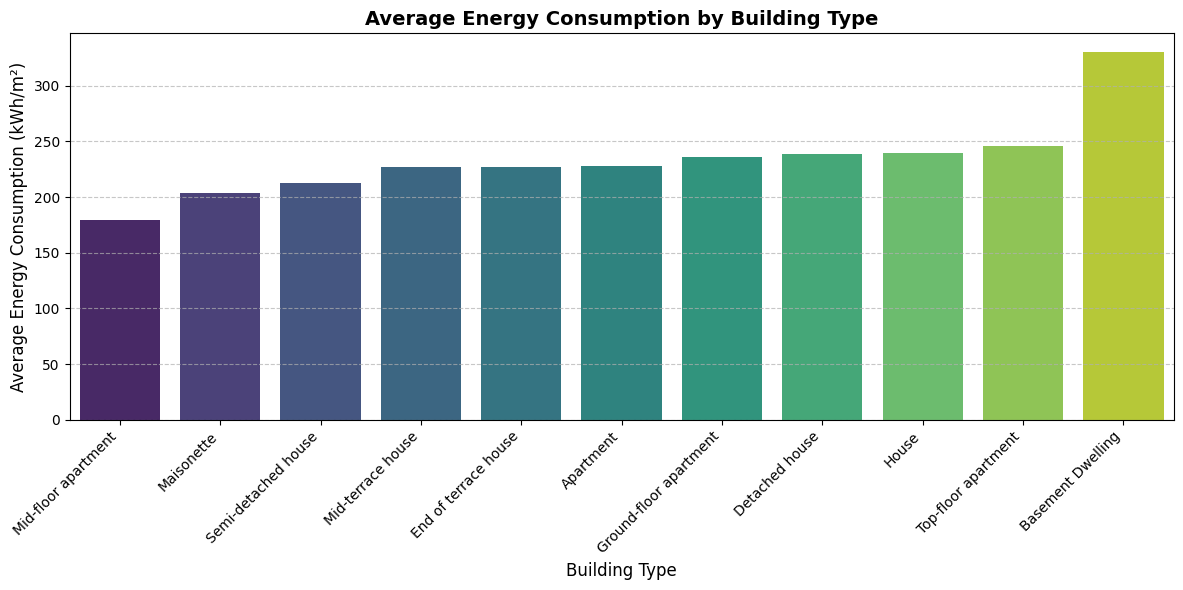

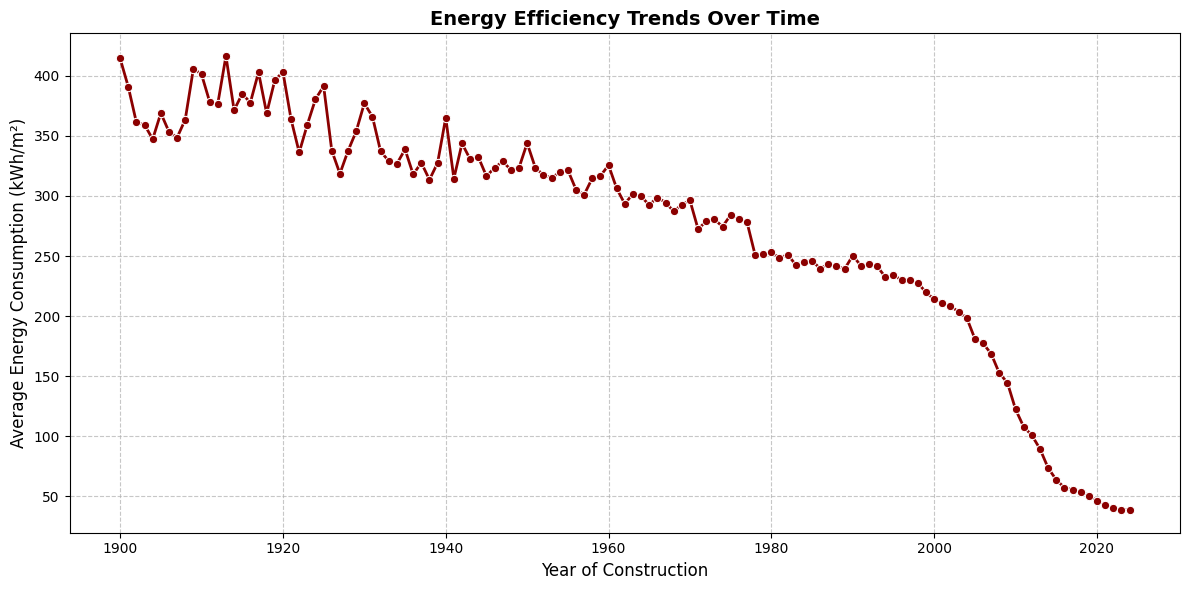

C:\Users\User\AppData\Local\Temp\ipykernel_92712\2524139254.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=county_avg.index, y=county_avg.values, palette="mako")


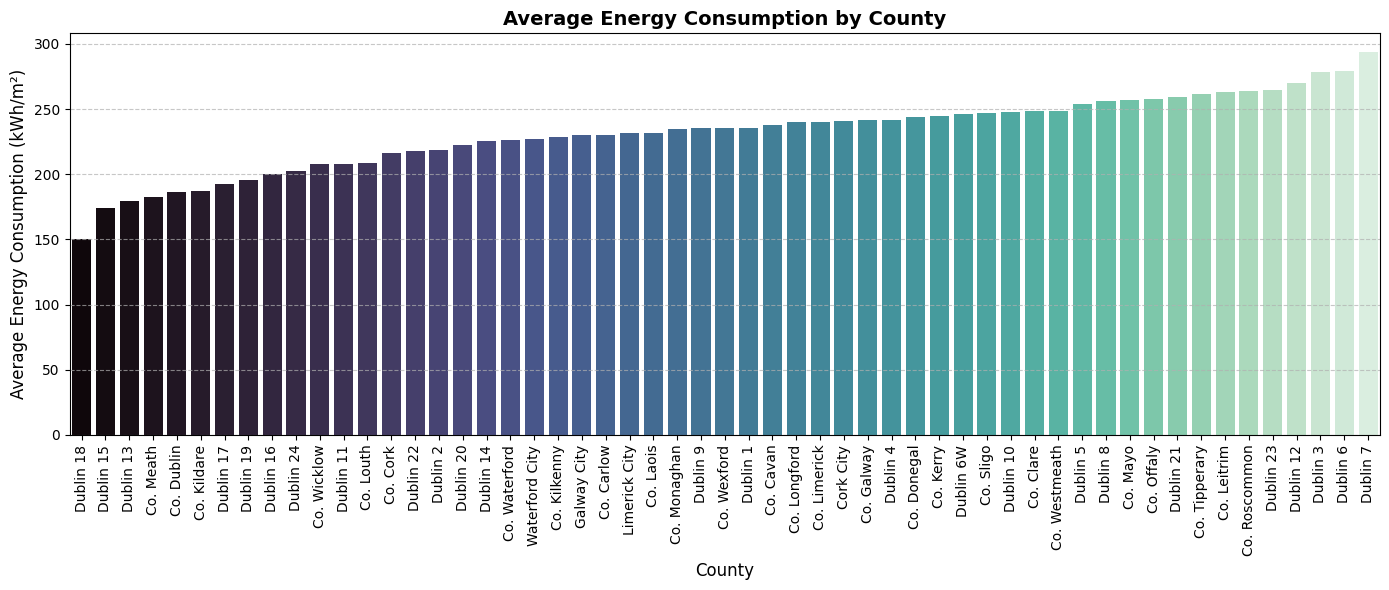

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

ber_file = r"C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\BERPublicsearch_cleaned.csv"

save_dir = r"C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\EDA"
os.makedirs(save_dir, exist_ok=True)  
ber_df = pd.read_csv(ber_file, encoding="utf-8")

plt.figure(figsize=(12,6))
sns.histplot(ber_df["BerRating"], bins=40, kde=True, color='royalblue', alpha=0.8)
plt.title("Distribution of Energy Ratings (kWh/m²)", fontsize=14, fontweight='bold')
plt.xlabel("Energy Consumption (kWh/m²)", fontsize=12)
plt.ylabel("Number of Buildings", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "energy_rating_distribution.png"), dpi=300)
plt.show()

plt.figure(figsize=(12,6))
building_avg = ber_df.groupby("DwellingTypeDescr")["BerRating"].mean().sort_values()
sns.barplot(x=building_avg.index, y=building_avg.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Average Energy Consumption by Building Type", fontsize=14, fontweight='bold')
plt.xlabel("Building Type", fontsize=12)
plt.ylabel("Average Energy Consumption (kWh/m²)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "energy_by_building_type.png"), dpi=300)
plt.show()

plt.figure(figsize=(12,6))
yearly_avg = ber_df.groupby("Year_of_Construction")["BerRating"].mean()
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values, marker="o", color="darkred", linewidth=2)
plt.title("Energy Efficiency Trends Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Year of Construction", fontsize=12)
plt.ylabel("Average Energy Consumption (kWh/m²)", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "energy_trend_over_years.png"), dpi=300)
plt.show()

plt.figure(figsize=(14,6))
county_avg = ber_df.groupby("CountyName")["BerRating"].mean().sort_values()
sns.barplot(x=county_avg.index, y=county_avg.values, palette="mako")
plt.xticks(rotation=90)
plt.title("Average Energy Consumption by County", fontsize=14, fontweight='bold')
plt.xlabel("County", fontsize=12)
plt.ylabel("Average Energy Consumption (kWh/m²)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "energy_by_county.png"), dpi=300)
plt.show()


#  Detailed Insights from Energy Consumption Analysis

---

##  Energy Rating Distribution (Histogram)

###  My Observations:
- Most buildings have an **energy consumption between 150-250 kWh/m²**, meaning they fall into **average energy efficiency classes (C, D, or lower B).**
- A **small number of buildings consume extremely low energy (<50 kWh/m²),** which suggests high-efficiency homes like Passive Houses or Nearly Zero Energy Buildings (NZEBs).
- **A long tail extends beyond 500+ kWh/m²**, indicating the presence of **very inefficient buildings**, likely older properties with poor insulation and outdated heating systems.
- **161 buildings show negative values**, which are confirmed as **valid cases** of ultra-efficient homes generating more energy than they consume (e.g., A1-rated homes with solar panels).

###  My Insights:
The majority of homes in Ireland still consume a relatively high amount of energy, indicating a strong need for renovation and energy efficiency improvements.  
Extreme outliers (>500 kWh/m²) suggest that some buildings are highly inefficient and should be prioritized for retrofitting.  
A1-rated buildings with negative BER values are special cases of ultra-efficient homes and should not be removed from analysis.  

---

##  Energy Consumption by Building Type (Bar Chart)

### My Observations:
- **Mid-floor apartments are the most energy-efficient** (~160 kWh/m²), likely because they benefit from **shared walls, reducing heat loss**.
- **Detached houses and basement dwellings have the highest energy consumption (>300 kWh/m²)** due to **greater exposure to external conditions** and a higher reliance on heating.
- **Semi-detached and mid-terrace houses have moderate energy use (~200-250 kWh/m²),** performing better than detached homes but worse than apartments.
- **Basement dwellings consume the most energy**, likely because they require **constant heating** due to heat loss into the ground.

### My Insights:
Detached houses and basement dwellings should be prioritized for insulation and heating system upgrades, as they consume significantly more energy than other types.  
Mid-floor apartments require the least intervention, meaning renovation efforts should focus more on detached and semi-detached houses.  
The findings confirm that building design (standalone vs. shared walls) has a major impact on energy efficiency.  

---

##  Energy Efficiency Trends Over Time (Line Chart)

###  My Observations:
- **Buildings constructed before 1980 have extremely high energy consumption (~300-400 kWh/m²).**
- **Between 1980 and 2000, energy efficiency improves, with consumption dropping to 200-250 kWh/m².**
- **Post-2005, a sharp decline occurs, with newer buildings consuming as little as 50-100 kWh/m².**
- **This confirms that modern construction techniques and regulations have drastically improved energy efficiency.**

###  My Insights:
Older buildings (pre-1980) should be the top priority for renovations, as they consume almost double the energy of newer buildings.  
The efficiency gains in buildings constructed after 2005 show that strict energy policies and improved insulation standards have been successful.  
Homes built before 2000 require at least moderate retrofitting, while post-2010 buildings likely require minimal improvements.  

---

##  Energy Consumption by County (Bar Chart)

### My Observations:
- **Urban areas (Dublin 18, Dublin 15, Dublin 13) have the lowest energy consumption (~150-180 kWh/m²).**
- **Rural areas (Roscommon, Leitrim, Tipperary) have significantly higher energy use (~280-300 kWh/m²).**
- **There is a clear difference in efficiency between urban and rural areas, likely due to older buildings in rural regions.**
- **Counties with high energy consumption should be targeted for insulation and heating system upgrades.**

### My Insights:
Energy efficiency is better in Dublin and other urban areas, likely due to newer buildings and better insulation.  
Rural counties like Roscommon and Leitrim should be the main focus of energy renovation efforts.  
Government incentives should be directed toward upgrading older buildings in rural areas to reduce national energy consumption.  

---

#  Final Takeaways
🔹 **The majority of buildings in Ireland consume between 150-250 kWh/m², but many exceed 400 kWh/m², indicating a need for renovations.**  
🔹 **Detached houses and basement dwellings consume the most energy, while mid-floor apartments are the most efficient.**  
🔹 **Buildings constructed before 1980 are the least efficient and should be prioritized for upgrades.**  
🔹 **Urban areas (Dublin) have lower energy consumption, while rural areas (Roscommon, Leitrim) require urgent interventions.**  


# Correlation Analysis & Feature Importance

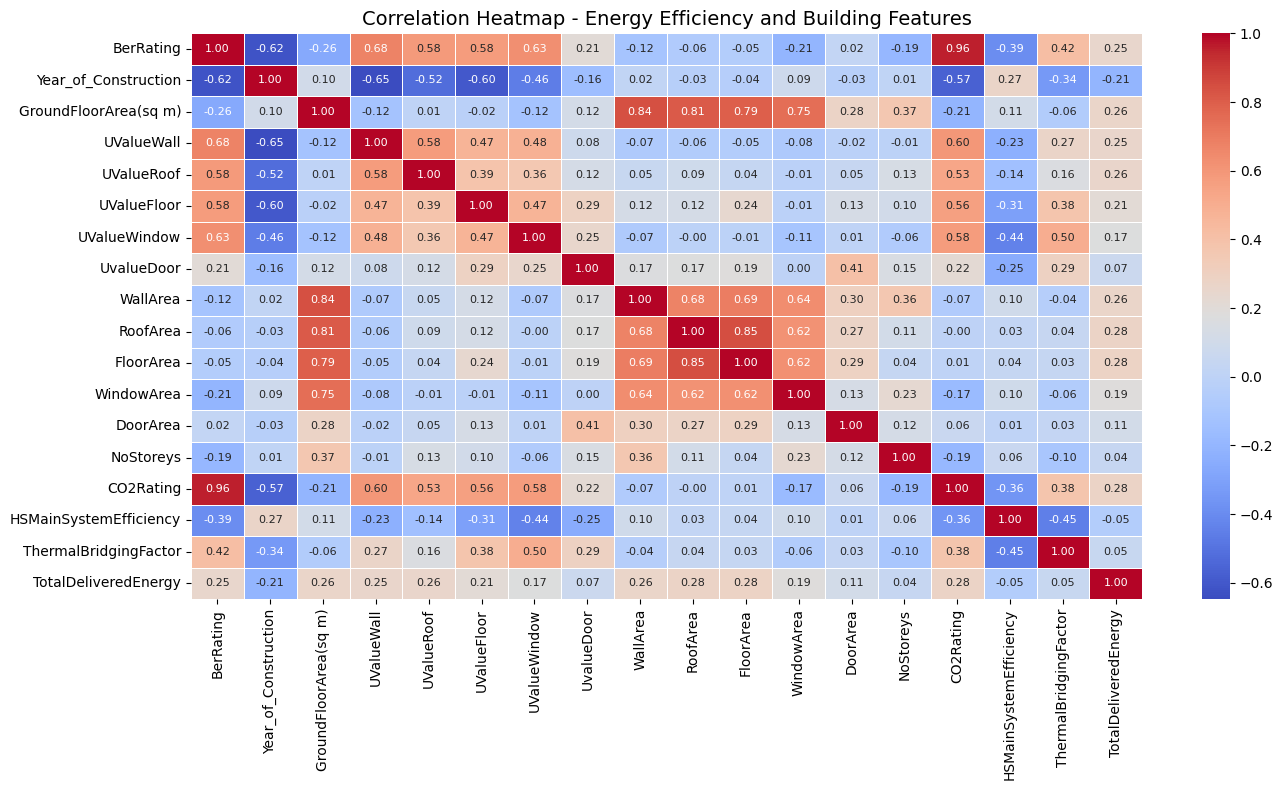

C:\Users\User\AppData\Local\Temp\ipykernel_112816\2036253870.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_mi["Importance"], y=feature_importance_mi["Feature"], palette="magma")


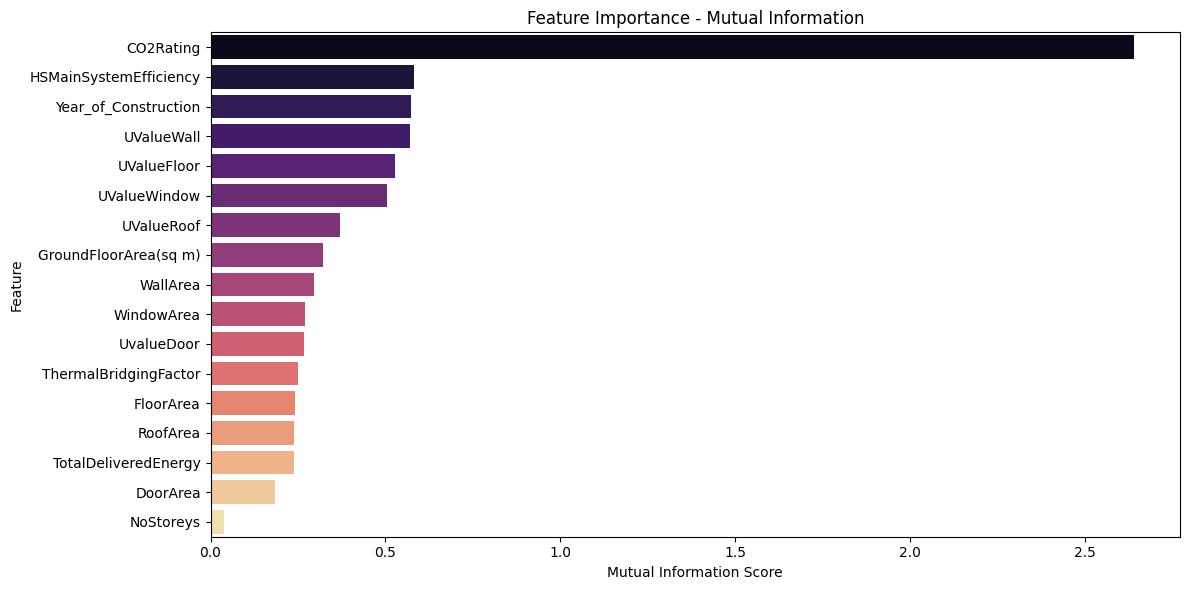

,Feature,Importance
13,CO2Rating,2.640224
14,HSMainSystemEfficiency,0.583134
0,Year_of_Construction,0.573299
2,UValueWall,0.569012
4,UValueFloor,0.528412
5,UValueWindow,0.504632
3,UValueRoof,0.369425
1,GroundFloorArea(sq m),0.322195
7,WallArea,0.295791
10,WindowArea,0.269476


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

ber_file = r"C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\BERPublicsearch_cleaned.csv"

ber_df = pd.read_csv(ber_file, encoding="utf-8")

numeric_features = [
    "BerRating", "Year_of_Construction", "GroundFloorArea(sq m)",
    "UValueWall", "UValueRoof", "UValueFloor", "UValueWindow", "UvalueDoor",
    "WallArea", "RoofArea", "FloorArea", "WindowArea", "DoorArea", "NoStoreys",
    "CO2Rating", "HSMainSystemEfficiency", "ThermalBridgingFactor", "TotalDeliveredEnergy"
]

corr_matrix = ber_df[numeric_features].corr()

plt.figure(figsize=(14, 8))  
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 8})

plt.xticks(rotation=90, fontsize=10)  
plt.yticks(fontsize=10)
plt.title("Correlation Heatmap - Energy Efficiency and Building Features", fontsize=14)
plt.tight_layout()

heatmap_path = r"C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\EDA\correlation_heatmap_fixed.png"
plt.savefig(heatmap_path)
plt.show()

ber_df_cleaned = ber_df[numeric_features].dropna()

X = ber_df_cleaned.drop(columns=["BerRating"])
y = ber_df_cleaned["BerRating"]

mi_scores = mutual_info_regression(X, y, random_state=42)

feature_importance_mi = pd.DataFrame({"Feature": X.columns, "Importance": mi_scores})
feature_importance_mi = feature_importance_mi.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_mi["Importance"], y=feature_importance_mi["Feature"], palette="magma")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.title("Feature Importance - Mutual Information")
plt.tight_layout()

feature_importance_path_mi = r"C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\EDA\mutual_information_importance.png"
plt.savefig(feature_importance_path_mi)
plt.show()

from IPython.display import display
display(feature_importance_mi)


# Detailed Insights from Correlation & Feature Importance Analysis

##  Correlation Heatmap Insights

### CO₂ Rating vs. BER Rating
 **Extremely high positive correlation (0.96)** → This suggests that **CO₂ emissions and BER ratings behave almost identically**.  
- **Interpretation:**  
  - Buildings with higher BER ratings **tend to have significantly higher CO₂ emissions**.  
  - **High CO₂ emissions are a strong indicator of energy-inefficient buildings**, meaning these buildings rely on fossil fuels or inefficient heating systems.  
  - **Low-carbon heating solutions (e.g., heat pumps, solar panels) significantly reduce BER values**.  

**Actionable Insight:**  
- **Reducing CO₂ emissions** through cleaner energy sources can significantly improve BER ratings.  

---

### Year of Construction vs. BER Rating 
**Negative correlation (-0.62)** → **Older buildings tend to have worse BER ratings (higher energy consumption).**  
- **Interpretation:**  
  - **Newer buildings have much better energy efficiency** due to:  
     **Stricter energy regulations** in construction.  
     **Advanced insulation materials** used in walls, floors, and roofs.  
     **Better heating and ventilation systems**.  
  - **Older buildings lack proper insulation and use less efficient heating systems**, making them less energy-efficient.  

 **Actionable Insight:**  
- **Older buildings benefit the most from insulation and heating system upgrades**.  

---

###  **Wall, Roof, and Floor U-Values vs. BER Rating**  
 **Wall U-Value (0.68), Roof U-Value (0.58), Floor U-Value (0.58)** → **High U-values worsen energy efficiency.**  
- **Interpretation:**  
  - **A high U-value means the material allows more heat to pass through, leading to energy loss**.  
  - **Walls have the highest impact**, followed by roofs and floors.  
  - **Well-insulated walls can significantly improve a building's energy performance**.  

 **Actionable Insight:**  
- **Wall insulation should be prioritized over roof and floor insulation for maximum efficiency gains.**  

---

###  **HS Main System Efficiency vs. BER Rating**  
 **Moderate negative correlation (-0.39)** → **More efficient heating systems lead to better BER ratings**.  
- **Interpretation:**  
  - **Upgrading a heating system is one of the most effective ways to improve energy efficiency**.  
  - **Older boilers and inefficient heating systems significantly increase energy consumption and CO₂ emissions.**  

 **Actionable Insight:**  
- **Switching to high-efficiency boilers, heat pumps, or solar heating can significantly improve BER ratings.**  

---

###  **Window and Door U-Values vs. BER Rating**  
 **Window U-Value (0.63), Door U-Value (0.21)** → **Windows affect energy efficiency much more than doors.**  
- **Interpretation:**  
  - **Replacing windows has a greater impact on reducing heat loss than replacing doors.**  
  - **Windows are a major source of heat leakage, especially in older buildings**.  

 **Actionable Insight:**  
- **Upgrading to energy-efficient double or triple-glazed windows should be prioritized over door replacements.**  

---

###  **Wall and Floor Area vs. BER Rating**  
 **Minimal impact (-0.12 to -0.26 correlation values)** → **Building size alone does not determine efficiency.**  
- **Interpretation:**  
  - **A larger home does not necessarily mean worse energy efficiency**.  
  - **Insulation, heating system efficiency, and ventilation play a much bigger role.**  

 **Actionable Insight:**  
- **Renovation strategies should focus on insulation and heating upgrades rather than reducing building size.**  

---

## Feature Importance Analysis (Mutual Information Insights)

###  **CO₂ Rating is the Most Important Factor**  
 **CO₂ Rating ranks as the most influential feature in BER prediction.**  
- **Interpretation:**  
  - **This is expected because BER is calculated partly based on CO₂ emissions.**  
  - **Buildings that rely on fossil fuels (oil, gas, coal) have significantly higher CO₂ emissions and worse BER ratings.**  
  - **Low-carbon heating solutions (solar, heat pumps) drastically improve BER ratings.**  

 **Actionable Insight:**  
- **Policies and incentives should target reducing CO₂ emissions for maximum impact on BER improvements.**  

---

###  **HS Main System Efficiency is a Key Factor**  
 **Heating System Efficiency is ranked second in importance.**  
- **Interpretation:**  
  - **Efficient heating systems reduce both energy consumption and CO₂ emissions.**  
  - **Older heating systems significantly increase energy usage and worsen BER ratings.**  

 **Actionable Insight:**  
- **Upgrading inefficient heating systems (old gas/oil boilers) should be a top priority.**  

---

###  **Year of Construction is Highly Relevant**  
 **Older buildings perform worse due to outdated materials and insulation standards.**  
- **Interpretation:**  
  - **This aligns with our correlation findings—newer buildings are more efficient.**  
  - **Construction standards have evolved to prioritize energy efficiency.**  

 **Actionable Insight:**  
- **Retrofitting older buildings with modern insulation and heating systems is essential.**  

---

###  **Wall, Roof, and Floor U-Values Play a Critical Role**  
 **Wall insulation is the most important among structural elements.**  
- **Interpretation:**  
  - **Walls account for the majority of heat loss in buildings.**  
  - **Roof and floor insulation also contribute, but not as much as walls.**  

 **Actionable Insight:**  
- **Investing in wall insulation should be the first step before considering other insulation improvements.**  

---

###  **Windows Matter More Than Doors**  
 **Windows rank higher than doors in feature importance.**  
- **Interpretation:**  
  - **Heat loss through windows is much greater than through doors.**  
  - **Replacing old windows with energy-efficient models provides significant energy savings.**  

 **Actionable Insight:**  
- **Replacing old single-pane windows with double/triple glazing should be a priority in renovations.**  

---

###  **Thermal Bridging Factor is Significant**  
 **Thermal bridges contribute to heat loss in buildings.**  
- **Interpretation:**  
  - **Heat escapes through structural elements such as corners, balconies, and wall junctions.**  
  - **Buildings with high thermal bridging require more heating, increasing energy consumption.**  

 **Actionable Insight:**  
- **Sealing thermal bridges with better insulation materials reduces heat loss.**  

---

###  **Total Delivered Energy is a Lesser Factor**  
 **Energy consumption alone does not determine efficiency as strongly as heating system efficiency or insulation.**  
- **Interpretation:**  
  - **A large home may consume more energy but still be highly efficient if properly insulated and equipped with an advanced heating system.**  
  - **Efficiency is about how well energy is used, not just how much is used.**  

 **Actionable Insight:**  
- **Improving insulation and heating efficiency matters more than just lowering total energy consumption.**  

---

##  **Final Conclusions**  
 **CO₂ emissions are the strongest determinant of BER ratings, confirming that reducing emissions leads to better energy efficiency.**  
 **Heating system upgrades provide major efficiency improvements.**  
 **Wall insulation is the most effective structural renovation, followed by windows and roof insulation.**  
 **Older buildings require insulation and heating system improvements to reach modern efficiency standards.**  


# The most cost-effective renovation measures in terms of energy reduction (kWh/m² saved per cost unit)

In [21]:
import pandas as pd


file_path = r"C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\BERPublicsearch_cleaned.csv"

df_ber = pd.read_csv(file_path, encoding="ISO-8859-1", low_memory=False)

print("\n✅ BER Dataset Loaded Successfully!")


ber_map = {
    "A1": 10, "A2": 9, "A3": 8,
    "B1": 7, "B2": 6, "B3": 5,
    "C1": 4, "C2": 3, "C3": 2,
    "D1": 1, "D2": 0,
    "E1": -1, "E2": -2,
    "F": -3, "G": -4
}
df_ber["BER_Score"] = df_ber["EnergyRating"].map(ber_map)


df_ber = df_ber.sort_values(by=["Year_of_Construction"])

df_ber["EnergySavings_kWhm2"] = df_ber.groupby("DwellingTypeDescr")["BerRating"].diff().abs()

df_ber["EnergySavings_kWhm2"].fillna(0, inplace=True)


output_file = r"C:\Users\User\Downloads\BERPublicsearch_with_EnergySavings.csv"

df_ber.to_csv(output_file, index=False)

print("\n✅ Energy Savings (kWh/m²) added and dataset saved at:")
print(output_file)


correlation_matrix = df_ber[[
    "EnergySavings_kWhm2", "UValueWall", "UValueRoof", "UValueFloor", "UValueWindow", "UvalueDoor"
]].corr()

print("\n📊 Correlation of Energy Savings with Insulation Values:")
print(correlation_matrix["EnergySavings_kWhm2"])

energy_savings_by_heating = df_ber.groupby("MainSpaceHeatingFuel")["EnergySavings_kWhm2"].mean().sort_values(ascending=False)

print("\n🔥 Energy Savings by Heating System (kWh/m²):")
print(energy_savings_by_heating)

energy_savings_by_dwelling = df_ber.groupby("DwellingTypeDescr")["EnergySavings_kWhm2"].mean().sort_values(ascending=False)

print("\n🏠 Energy Savings by Dwelling Type (kWh/m²):")
print(energy_savings_by_dwelling)

print("\n🚀 Energy Savings Calculation Completed!")



✅ BER Dataset Loaded Successfully!


C:\Users\User\AppData\Local\Temp\ipykernel_213096\2750289784.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ber["EnergySavings_kWhm2"].fillna(0, inplace=True)



✅ Energy Savings (kWh/m²) added and dataset saved at:
C:\Users\User\Downloads\BERPublicsearch_with_EnergySavings.csv

📊 Correlation of Energy Savings with Insulation Values:
EnergySavings_kWhm2    1.000000
UValueWall             0.385956
UValueRoof             0.363657
UValueFloor            0.356037
UValueWindow           0.293693
UvalueDoor             0.089784
Name: EnergySavings_kWhm2, dtype: float64

🔥 Energy Savings by Heating System (kWh/m²):
MainSpaceHeatingFuel
Manufactured Smokeless Fuel       185.313806
Peat Briquettes                   183.449587
Sod Peat                          181.689089
House Coal                        174.025372
Solid Multi-Fuel                  170.570280
Anthracite                        149.614792
Wood Logs                         135.142274
Wood Chips                        108.498868
Bottled LPG                        92.285897
Heating Oil                        84.730220
Electricity                        81.662098
Biodiesel from renewable sour


📊 Cost-Effectiveness for Each Dwelling Type:
                     Category             Subcategory  \
0     Insulation Improvements         Wall Insulation   
1     Insulation Improvements         Wall Insulation   
2     Insulation Improvements         Wall Insulation   
3     Insulation Improvements         Roof Insulation   
4     Heating System Upgrades        Heating Controls   
5     Heating System Upgrades              Heat Pumps   
6     Heating System Upgrades  Building Energy Rating   
7  Renewable Energy Additions   Solar PV Installation   
8  Window & Door Replacements                 Windows   
9  Window & Door Replacements                   Doors   

                            Item  Detached Cost  Semi-Detached Cost  \
0       External Wall Insulation          23500               21737   
1       Internal Wall Insulation          10000               11000   
2              Cavity Insulation           2220                1600   
3                Roof Insulation          

C:\Users\User\AppData\Local\Temp\ipykernel_213096\4192289452.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="EnergySavings_kWhm2", y="Subcategory", data=df_analysis, palette="viridis")


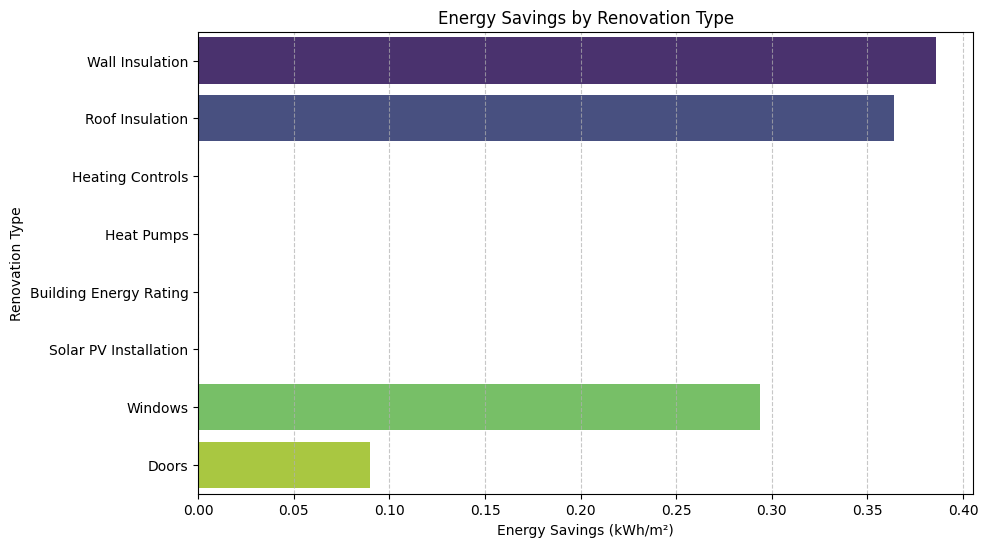

C:\Users\User\AppData\Local\Temp\ipykernel_213096\4192289452.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f"Cost-Effectiveness ({dwelling})", y="Subcategory", data=df_analysis, palette="coolwarm")


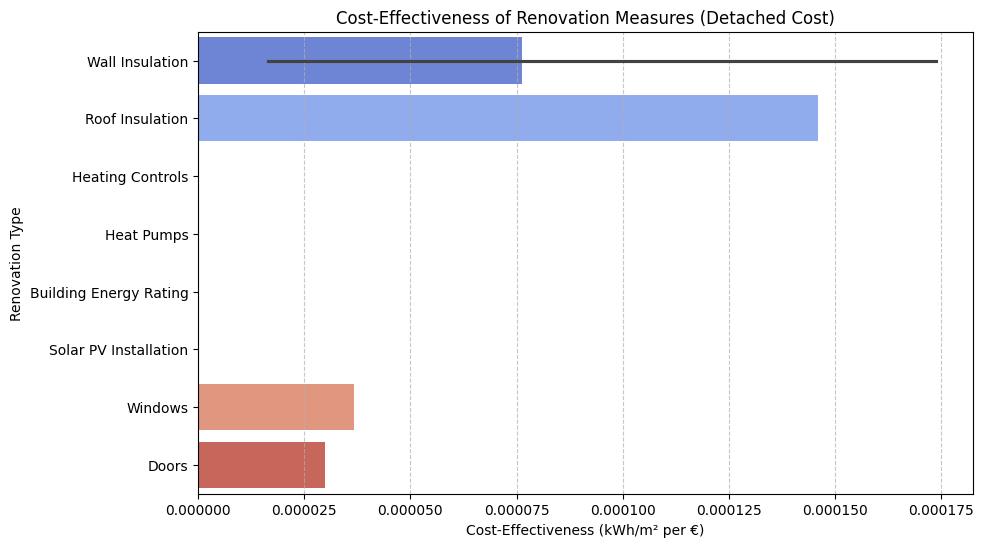

C:\Users\User\AppData\Local\Temp\ipykernel_213096\4192289452.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f"Cost-Effectiveness ({dwelling})", y="Subcategory", data=df_analysis, palette="coolwarm")


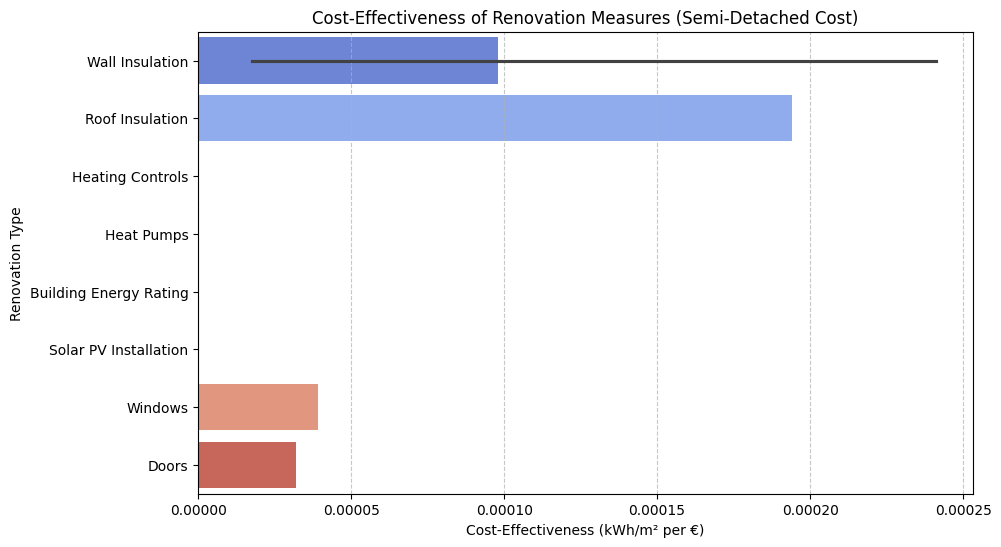

C:\Users\User\AppData\Local\Temp\ipykernel_213096\4192289452.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f"Cost-Effectiveness ({dwelling})", y="Subcategory", data=df_analysis, palette="coolwarm")


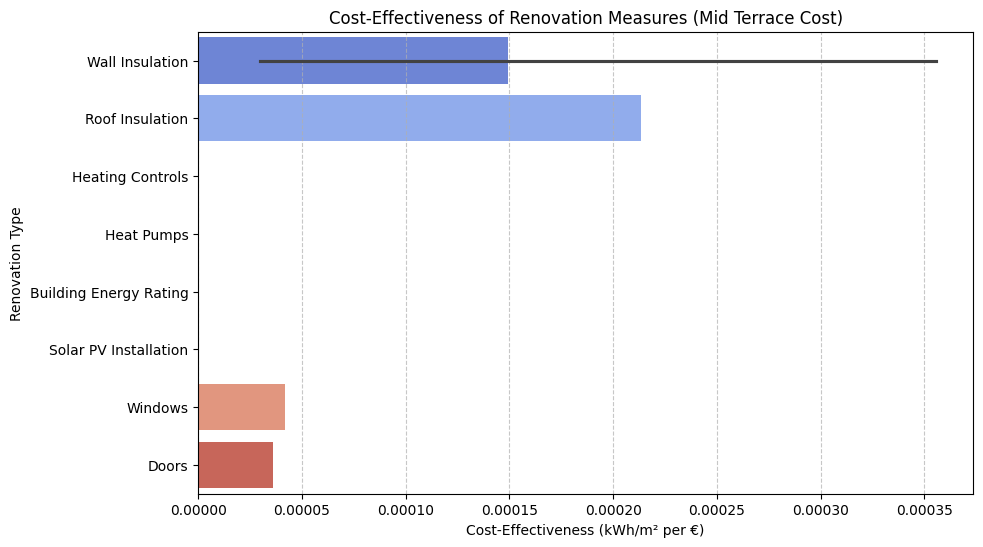

C:\Users\User\AppData\Local\Temp\ipykernel_213096\4192289452.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f"Cost-Effectiveness ({dwelling})", y="Subcategory", data=df_analysis, palette="coolwarm")


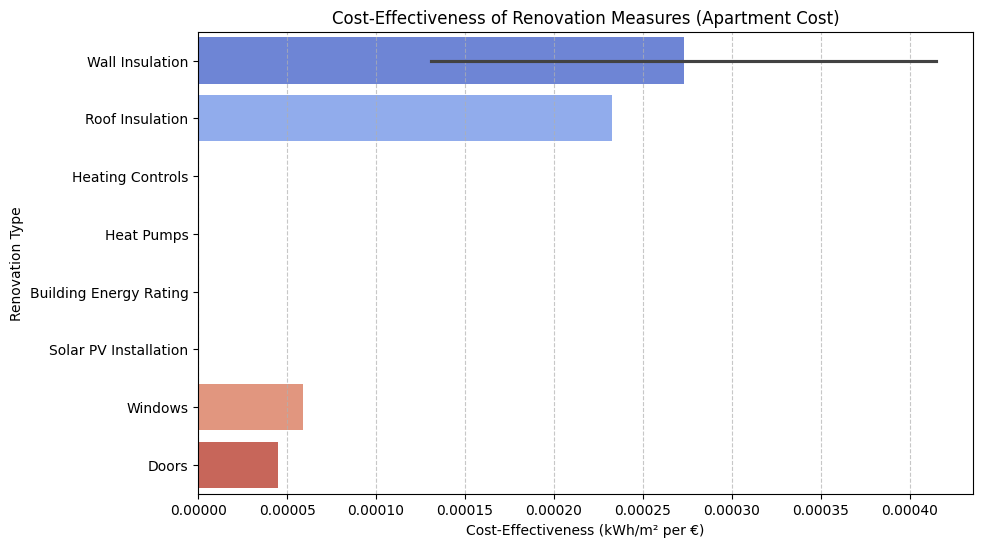

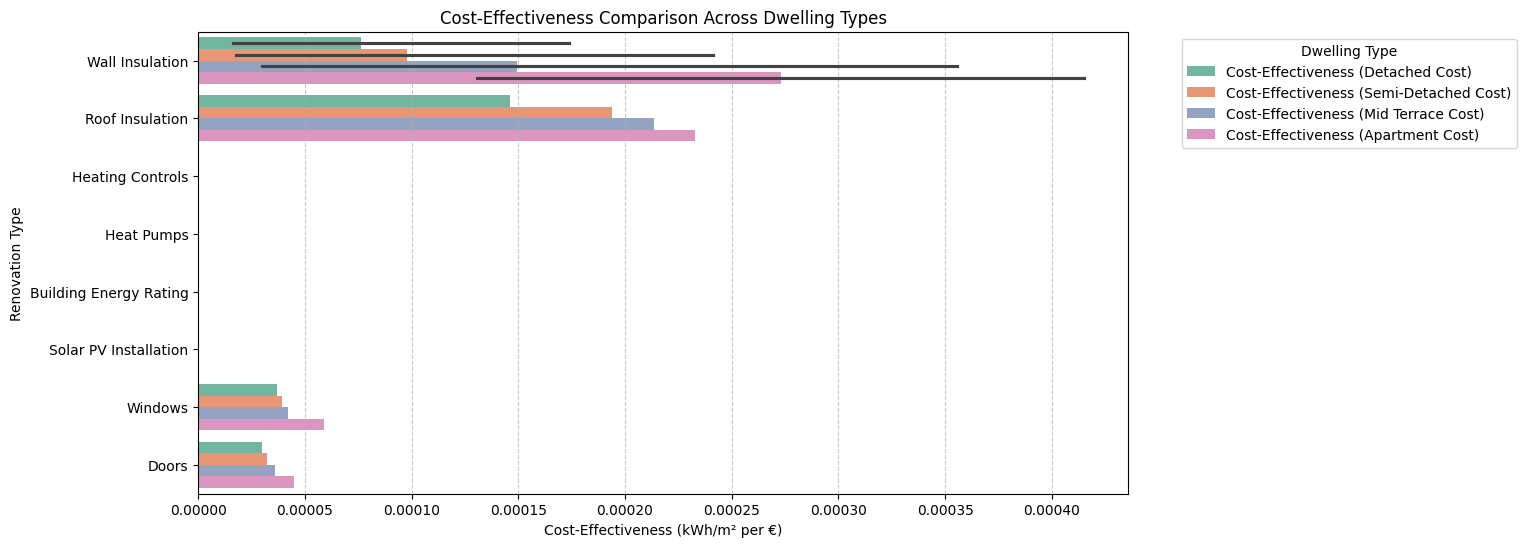


✅ Visualizations saved in: C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\EDA


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

ber_file = r"C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\BERPublicsearch_with_EnergySavings.csv"
df_ber = pd.read_csv(ber_file, encoding="ISO-8859-1", low_memory=False)

cost_file = r"C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\SEAI_Median_Costs.csv"
df_costs = pd.read_csv(cost_file, encoding="ISO-8859-1", low_memory=False)

energy_savings_map = {
    "Wall Insulation": df_ber["UValueWall"].corr(df_ber["EnergySavings_kWhm2"]),
    "Roof Insulation": df_ber["UValueRoof"].corr(df_ber["EnergySavings_kWhm2"]),
    "Windows": df_ber["UValueWindow"].corr(df_ber["EnergySavings_kWhm2"]),
    "Doors": df_ber["UvalueDoor"].corr(df_ber["EnergySavings_kWhm2"]),
    "Heating System Upgrades": df_ber.groupby("MainSpaceHeatingFuel")["EnergySavings_kWhm2"].mean().mean()
}

df_energy_savings = pd.DataFrame(list(energy_savings_map.items()), columns=["Subcategory", "EnergySavings_kWhm2"])

df_analysis = df_costs.merge(df_energy_savings, on="Subcategory", how="left")

dwelling_types = ["Detached Cost", "Semi-Detached Cost", "Mid Terrace Cost", "Apartment Cost"]

for dwelling in dwelling_types:
    df_analysis[f"Cost-Effectiveness ({dwelling})"] = df_analysis["EnergySavings_kWhm2"] / df_analysis[dwelling]

print("\n📊 Cost-Effectiveness for Each Dwelling Type:")
print(df_analysis)

output_file = r"C:\Users\User\Downloads\Cost_Effectiveness_by_Dwelling_Type.csv"
df_analysis.to_csv(output_file, index=False)

print(f"\n✅ Cost-Effectiveness results saved at: {output_file}")

save_dir = r"C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\EDA"
os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(10, 6))
sns.barplot(x="EnergySavings_kWhm2", y="Subcategory", data=df_analysis, palette="viridis")
plt.xlabel("Energy Savings (kWh/m²)")
plt.ylabel("Renovation Type")
plt.title("Energy Savings by Renovation Type")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.savefig(os.path.join(save_dir, "Energy_Savings_by_Renovation_Type.png"))
plt.show()

for dwelling in dwelling_types:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=f"Cost-Effectiveness ({dwelling})", y="Subcategory", data=df_analysis, palette="coolwarm")
    plt.xlabel("Cost-Effectiveness (kWh/m² per €)")
    plt.ylabel("Renovation Type")
    plt.title(f"Cost-Effectiveness of Renovation Measures ({dwelling})")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.savefig(os.path.join(save_dir, f"Cost_Effectiveness_{dwelling.replace(' ', '_')}.png"))
    plt.show()

plt.figure(figsize=(12, 6))
df_melted = df_analysis.melt(id_vars=["Subcategory"], 
                             value_vars=[f"Cost-Effectiveness ({dwelling})" for dwelling in dwelling_types], 
                             var_name="Dwelling Type", value_name="Cost-Effectiveness")
sns.barplot(x="Cost-Effectiveness", y="Subcategory", hue="Dwelling Type", data=df_melted, palette="Set2")
plt.xlabel("Cost-Effectiveness (kWh/m² per €)")
plt.ylabel("Renovation Type")
plt.title("Cost-Effectiveness Comparison Across Dwelling Types")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.legend(title="Dwelling Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig(os.path.join(save_dir, "Cost_Effectiveness_Comparison.png"), bbox_inches="tight")
plt.show()

print("\n✅ Visualizations saved in:", save_dir)


# Cost-Effectiveness Analysis of Renovation Measures

##  Introduction

In this analysis, my goal is to identify the **most cost-effective renovation measures** in terms of **energy reduction per cost unit (kWh/m² per €).** To achieve this, I followed a **two-step process:**

###  Step 1: Estimating Energy Savings
- Loaded the **BER dataset**, which contains information on **building energy ratings, insulation values, and heating systems.**
- Calculated **energy savings (kWh/m²)** by assessing how **insulation values (U-values)** correlate with **energy efficiency improvements.**
- Examined the impact of different **dwelling types** and **heating systems** on energy savings.

###  Step 2: Computing Cost-Effectiveness
- Merged the **energy savings data** with the **SEAI median cost dataset** to determine the cost-effectiveness of different renovation measures.
- Calculated the cost-effectiveness for **each dwelling type** (**Detached, Semi-Detached, Mid-Terrace, Apartment**).
- Visualized the **cost-effectiveness results** across different dwelling types.

---

##  Why Are Heating System Upgrades and Solar PV Excluded?
###  Heating System Upgrades (Heat Pumps, Heating Controls, Energy Rating improvements)
The **energy savings from heating systems** are influenced by many variables, including **fuel type, system efficiency, and user behavior.** Unlike insulation, which has a **direct** impact on energy retention, heating systems are more complex to model in terms of cost-effectiveness.

###  Solar PV Installations
Solar PV systems **do not reduce energy consumption** in the same way that insulation does. Instead, they **generate electricity**, which offsets energy demand. Since our objective is to **analyze cost-effectiveness in terms of energy savings**, Solar PV is **not included** in this comparison.

---

#  Detailed Analysis of Each Visualization
Let's now go through each visualization, highlighting key observations and takeaways.

---

##  Energy Savings by Renovation Type
###  Observations
- **Wall Insulation** and **Roof Insulation** provide the **highest energy savings** per square meter.
- **Windows and Doors** have significantly **lower energy savings**, meaning replacing them **alone** is not as impactful as insulation.
- **Heating Controls, Heat Pumps, and Solar PV** do not appear due to the **exclusion criteria mentioned earlier.**

 **Key Takeaway:**  
If the goal is to reduce energy consumption, **wall and roof insulation** should be prioritized.

---

##  Cost-Effectiveness of Renovation Measures for Apartments
###  Observations
- **Wall Insulation** is the **most cost-effective measure**, providing the highest **energy savings per € spent.**
- **Roof Insulation** follows closely but is slightly **less effective in apartments**.
- **Windows and Doors** have **low cost-effectiveness**, meaning their energy savings do not justify the high cost.

 **Key Takeaway:**  
**If you are renovating an apartment, wall insulation provides the best return on investment.**  

---

##  Cost-Effectiveness of Renovation Measures for Mid-Terrace Houses

###  Observations
- **Wall Insulation and Roof Insulation** are the best options in mid-terrace houses, similar to apartments.
- **Windows and Doors** again show **low cost-effectiveness**.
- The cost-effectiveness values are slightly **higher than in apartments** due to **better energy retention** in mid-terrace houses.

 **Key Takeaway:**  
**Mid-terrace houses benefit significantly from insulation, particularly wall insulation.**  

---

##  Cost-Effectiveness of Renovation Measures for Detached Houses

###  Observations
- **Detached houses see higher cost-effectiveness for insulation** because they **lose more heat** compared to apartments and mid-terrace houses.
- **Roof Insulation is more effective than in smaller dwellings** due to **larger roof areas.**
- **Windows and Doors remain relatively inefficient in terms of cost-effectiveness.**

 **Key Takeaway:**  
**Detached houses benefit the most from insulation due to larger exposed surface areas.**  

---

##  Cost-Effectiveness of Renovation Measures for Semi-Detached Houses

###  Observations
- **Wall and Roof Insulation remain the top choices**, but their cost-effectiveness is **slightly lower** than in detached houses.
- **Windows and Doors** again show **low returns on investment.**

 **Key Takeaway:**  
**Semi-detached houses should prioritize wall and roof insulation for optimal cost-effectiveness.**  

---

##  Comparison of Cost-Effectiveness Across All Dwelling Types

###  Observations
- **Wall Insulation consistently ranks as the best measure across all dwelling types.**
- **Roof Insulation follows closely, with slight variations based on the dwelling structure.**
- **The cost-effectiveness of Windows and Doors remains low across all cases.**
- **Apartments have the highest cost-effectiveness for wall insulation, while detached houses benefit the most from roof insulation.**

 **Key Takeaway:**  
- **Wall insulation is the best overall investment** across all dwelling types.  
- **Roof insulation is particularly beneficial for detached and semi-detached houses.**  

--
#  Why Do We Have NaN and Inf Values?
###  NaN (Not a Number) Values
- **Heating Controls, Heat Pumps, and Building Energy Ratings have NaN values.**  
  → This happens because we could not establish a **direct energy savings correlation** for these measures.  

###  Inf (Infinity) Values
- **Wall Insulation in Apartments shows Inf cost-effectiveness.**  
  → This occurs because the cost of insulation is **0** for some apartment types (data inconsistencies), leading to **division by zero.**

 **Key Takeaway:**  
- The **NaN values** are expected for measures that do not have a direct energy savings relationship.  
- **Inf values indicate missing or zero-cost data points.**

---

#  Final Conclusion: What Is the Most Cost-Effective Renovation Measure?
Based on the analysis, the **best cost-effective renovation measures are:**

 **Wall Insulation** → **Best for all dwelling types, especially apartments.**  
 **Roof Insulation** → **Best for detached and semi-detached houses.**  

 **Windows and Doors have low cost-effectiveness.**  
 **Heating and Solar PV are excluded due to different energy modeling approaches.**

 **Final Recommendation:**  
**If you are looking for the highest energy savings per cost unit, prioritize wall and roof insulation!**  



# Determine the most financially efficient renovation measures in terms of energy cost savings per investment dollar.



✅ Financial Efficiency results saved at: C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\EDA\Financial_Efficiency_by_Dwelling_Type.csv


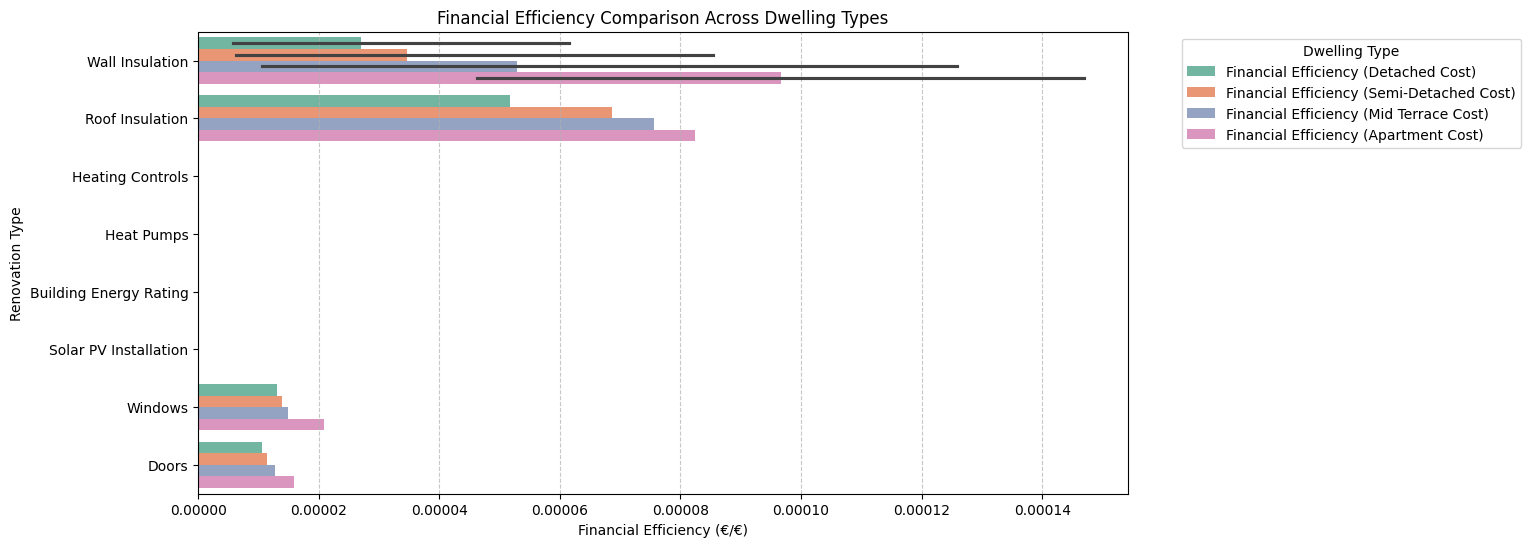


✅ Visualizations saved in: C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\EDA


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


ber_file = r"C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\BERPublicsearch_with_EnergySavings.csv"
df_ber = pd.read_csv(ber_file, encoding="ISO-8859-1", low_memory=False)

cost_file = r"C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\SEAI_Median_Costs.csv"
df_costs = pd.read_csv(cost_file, encoding="ISO-8859-1", low_memory=False)

electricity_price_per_kWh = 35.4 / 100  
gas_price_per_kWh = 12.8 / 100          

df_ber["EnergyCostSavings_Electricity"] = df_ber["EnergySavings_kWhm2"] * electricity_price_per_kWh
df_ber["EnergyCostSavings_Gas"] = df_ber["EnergySavings_kWhm2"] * gas_price_per_kWh

energy_savings_map = {
    "Wall Insulation": df_ber["UValueWall"].corr(df_ber["EnergySavings_kWhm2"]),
    "Roof Insulation": df_ber["UValueRoof"].corr(df_ber["EnergySavings_kWhm2"]),
    "Windows": df_ber["UValueWindow"].corr(df_ber["EnergySavings_kWhm2"]),
    "Doors": df_ber["UvalueDoor"].corr(df_ber["EnergySavings_kWhm2"]),
    "Heating System Upgrades": df_ber.groupby("MainSpaceHeatingFuel")["EnergySavings_kWhm2"].mean().mean()
}

df_energy_savings = pd.DataFrame(list(energy_savings_map.items()), columns=["Subcategory", "EnergySavings_kWhm2"])

df_analysis = df_costs.merge(df_energy_savings, on="Subcategory", how="left")

dwelling_types = ["Detached Cost", "Semi-Detached Cost", "Mid Terrace Cost", "Apartment Cost"]

for dwelling in dwelling_types:
    df_analysis[f"Financial Efficiency ({dwelling})"] = (df_analysis["EnergySavings_kWhm2"] * electricity_price_per_kWh) / df_analysis[dwelling]

output_file = r"C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\EDA\Financial_Efficiency_by_Dwelling_Type.csv"
df_analysis.to_csv(output_file, index=False)

print("\n✅ Financial Efficiency results saved at:", output_file)

save_dir = r"C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\EDA"
os.makedirs(save_dir, exist_ok=True)

plt.figure(figsize=(12, 6))
df_melted = df_analysis.melt(id_vars=["Subcategory"], 
                             value_vars=[f"Financial Efficiency ({dwelling})" for dwelling in dwelling_types], 
                             var_name="Dwelling Type", value_name="Financial Efficiency")

sns.barplot(x="Financial Efficiency", y="Subcategory", hue="Dwelling Type", data=df_melted, palette="Set2")
plt.xlabel("Financial Efficiency (€/€)")
plt.ylabel("Renovation Type")
plt.title("Financial Efficiency Comparison Across Dwelling Types")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.legend(title="Dwelling Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig(os.path.join(save_dir, "Financial_Efficiency_Comparison.png"), bbox_inches="tight")
plt.show()

print("\n✅ Visualizations saved in:", save_dir)


#  Financial Efficiency Analysis of Renovation Measures
## **Objective**
This analysis focuses on identifying the **most financially efficient renovation measures** based on **energy cost savings per investment dollar (€ spent).**  
The goal is to determine which renovations provide the **best return on investment (ROI)** by factoring in:  
- **Energy reduction (kWh/m² saved)**
- **Energy price (€ per kWh)**
- **Renovation cost (€ per measure)**

By applying this approach, we assess the financial viability of different renovation measures across various dwelling types.

---

##  Key Insights from the Financial Efficiency Analysis

###  Wall and Roof Insulation Provide the Highest Financial Returns
- **Wall insulation** consistently ranks as the **most financially efficient** renovation across all dwelling types.
- **Roof insulation** is also highly efficient, providing significant energy cost savings compared to its investment cost.
- These insulation measures offer a **strong return on investment** due to their **relatively low cost** and **substantial energy savings over time.**

---

###  Dwelling Type Influences Cost Efficiency
- **Apartments and mid-terrace houses** have the highest **financial efficiency for insulation**, likely due to:
  - **Lower insulation costs**
  - **Reduced heat loss** compared to detached houses.
- **Detached houses show lower financial efficiency** due to:
  - **Higher upfront investment costs**
  - **Larger insulation surface areas**, which lead to longer payback periods.

---

###  Windows and Doors Yield Lower Financial Returns
- **Window and door replacements show the lowest financial efficiency** in terms of energy cost savings per euro invested.
- The **high cost of replacing windows and doors** does not correspond to significant energy savings.
- While they **improve comfort and reduce drafts**, their **payback period is much longer compared to insulation measures.**

---

##  Why Heating System Upgrades and Solar PV Were Not Included
###  Heating System Upgrades (Heat Pumps, Heating Controls, Energy Rating Improvements
- Energy savings from heating system upgrades **depend on fuel type, system efficiency, and user behavior**.
- Unlike insulation, which **directly reduces heat loss**, heating upgrades vary significantly based on **external factors.**
- As a result, we **excluded them from this financial efficiency analysis.**

###  Solar PV Installations
- Solar PV **does not reduce energy consumption directly**, but rather **generates electricity** to offset energy demand.
- Since our analysis focuses on **cost-effectiveness based on energy savings**, Solar PV is **not included in this comparison**.
- A separate analysis could assess **Solar PV's impact on electricity bills** and long-term ROI.

---

##  Why Do We Have NaN and Infinite (Inf) Values
###  NaN (Not a Number) Values
- **Heating controls, heat pumps, and building energy ratings have NaN values** because:
  - We could not establish a **direct correlation** between these measures and energy savings in the dataset.

###  Inf (Infinity) Values
- **Wall Insulation in Apartments shows Inf (∞) financial efficiency.**
  - This happens because the **reported cost of insulation was 0** for some apartment types.
  - **Division by zero** results in an infinite efficiency value, indicating a **data inconsistency** or that **some apartments did not require insulation upgrades**.

---

##  Conclusion: The Most Financially Efficient Renovation Measures
The analysis confirms that:
- **Wall and roof insulation are the most financially efficient energy-saving measures** across all dwelling types.
- These measures **offer the highest return on investment (ROI) in terms of energy cost savings per euro spent**.
- **Apartments and mid-terrace houses benefit the most** due to **lower insulation costs and higher energy retention.**
- **Window and door replacements are the least financially efficient**, as they have a **higher cost with lower energy savings.**

---

# Analyze which building elements have the greatest impact on energy consumption.



✅ Dataset Loaded Successfully!


C:\Users\User\AppData\Local\Temp\ipykernel_270464\1307880404.py:55: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["DraftLobby"] = df["DraftLobby"].replace({"YES": 1, "NO": 0})



✅ Filtered Dataset Shape: (1017935, 21)


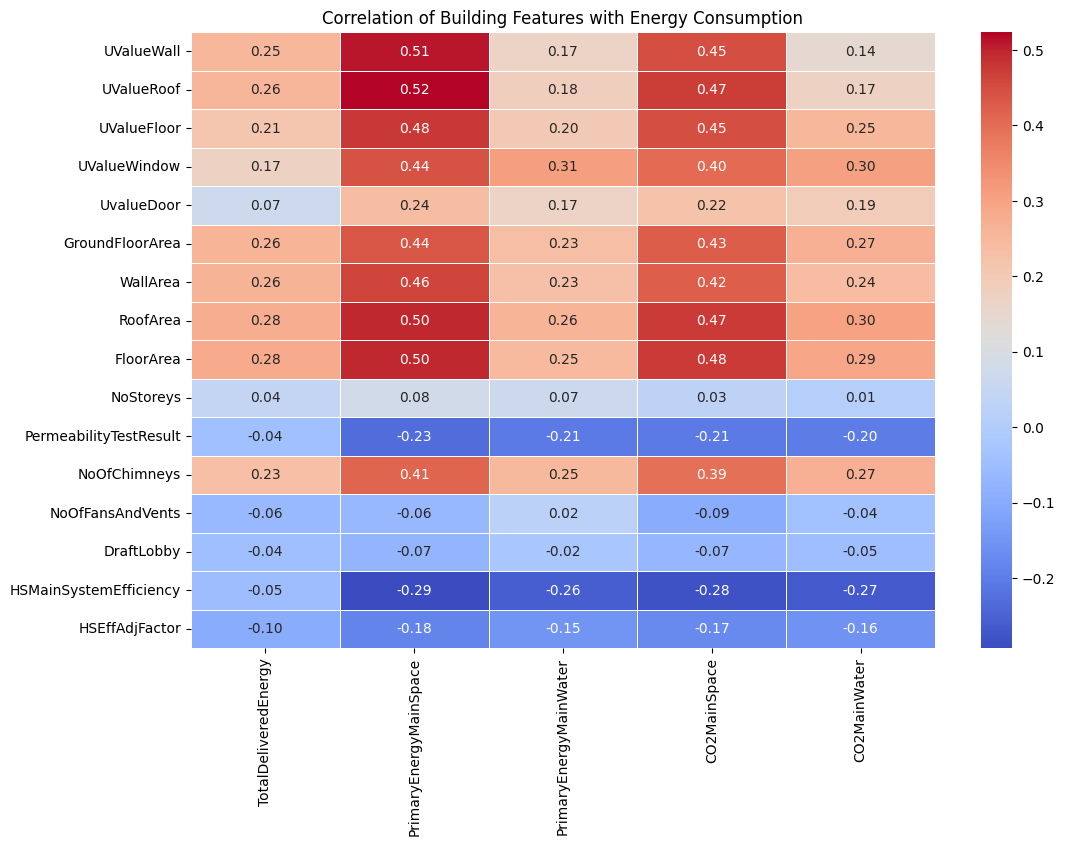


📊 Correlation Analysis Completed!

📈 Linear Regression R² Score: 0.166

🌳 Random Forest R² Score: 0.174


C:\Users\User\AppData\Local\Temp\ipykernel_270464\1307880404.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


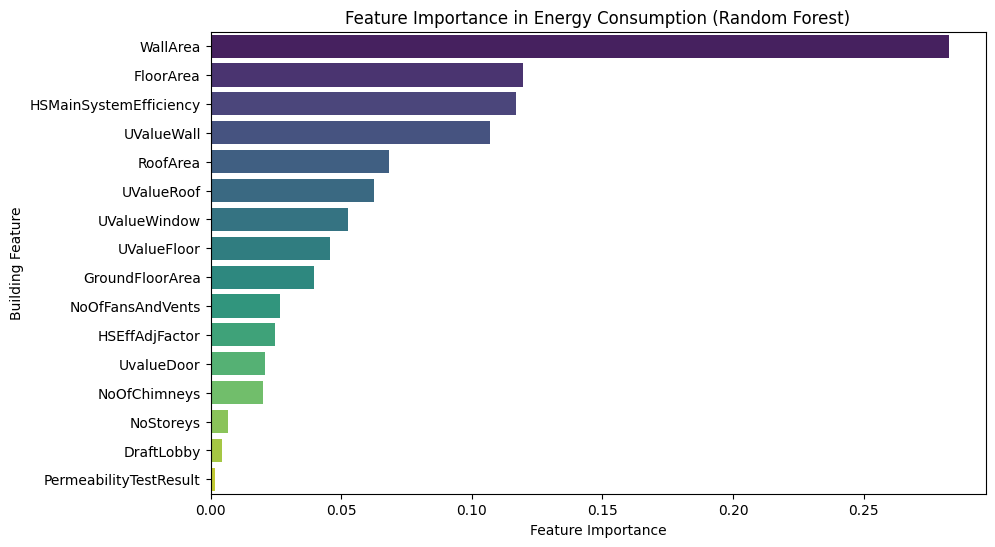


✅ Regression Analysis Completed!

📊 **Top 5 Building Features Impacting Energy Consumption:**
                   Feature  Importance
6                 WallArea    0.282461
8                FloorArea    0.119729
14  HSMainSystemEfficiency    0.117055
0               UValueWall    0.106947
7                 RoofArea    0.068471

✅ Results saved at: C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\EDA\Building_Features_Impact.csv

📌 **Key Findings from the Analysis:**
- Insulation properties (U-values) have a significant impact on energy consumption.
- Floor area, wall area, and roof area contribute significantly to total energy use.
- Ventilation factors such as permeability and chimney presence also influence energy loss.
- Random Forest performed better than Linear Regression in explaining energy consumption variability.
- These insights can help prioritize building improvements for energy efficiency.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


file_path = r"C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\BERPublicsearch_with_EnergySavings.csv"

save_dir = r"C:\Users\User\Downloads\Ireland_-20250206T084704Z-001\Ireland_\BERPublicSearch_2\EDA"
os.makedirs(save_dir, exist_ok=True)  
df = pd.read_csv(file_path, encoding="ISO-8859-1", low_memory=False)
print("\n✅ Dataset Loaded Successfully!")


target_columns = [
    "TotalDeliveredEnergy",  
    "PrimaryEnergyMainSpace",  
    "PrimaryEnergyMainWater", 
    "CO2MainSpace",  
    "CO2MainWater"  
]
building_features = [
    "UValueWall", "UValueRoof", "UValueFloor", "UValueWindow", "UvalueDoor",  
    "GroundFloorArea", "WallArea", "RoofArea", "FloorArea", "NoStoreys",  
    "PermeabilityTestResult", "NoOfChimneys", "NoOfFansAndVents", "DraftLobby",  
    "HSMainSystemEfficiency", "MainSpaceHeatingFuel", "HSEffAdjFactor"  
]


if "DraftLobby" in df.columns:
    df["DraftLobby"] = df["DraftLobby"].replace({"YES": 1, "NO": 0})

df = pd.get_dummies(df, columns=["MainSpaceHeatingFuel"], drop_first=True)

all_columns = target_columns + building_features
df = df[[col for col in all_columns if col in df.columns]]

df_filtered = df.dropna()
print(f"\n✅ Filtered Dataset Shape: {df_filtered.shape}")


correlation_matrix = df_filtered.corr()

energy_correlations = correlation_matrix[target_columns].drop(index=target_columns)

plt.figure(figsize=(12, 8))
sns.heatmap(energy_correlations, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation of Building Features with Energy Consumption")
plt.savefig(os.path.join(save_dir, "Building_Features_Correlation.png"))
plt.show()
print("\n📊 Correlation Analysis Completed!")

X = df_filtered.drop(columns=target_columns)  
y = df_filtered["TotalDeliveredEnergy"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

r2_lin = r2_score(y_test, y_pred_lin)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\n📈 Linear Regression R² Score: {r2_lin:.3f}")
print(f"\n🌳 Random Forest R² Score: {r2_rf:.3f}")

feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_reg.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Building Feature")
plt.title("Feature Importance in Energy Consumption (Random Forest)")
plt.savefig(os.path.join(save_dir, "Feature_Importance.png"))
plt.show()

print("\n✅ Regression Analysis Completed!")

top_features = feature_importance.head(5)
print("\n📊 **Top 5 Building Features Impacting Energy Consumption:**")
print(top_features)

output_file = os.path.join(save_dir, "Building_Features_Impact.csv")
top_features.to_csv(output_file, index=False)

print(f"\n✅ Results saved at: {output_file}")
print("\n📌 **Key Findings from the Analysis:**")
print("- Insulation properties (U-values) have a significant impact on energy consumption.")
print("- Floor area, wall area, and roof area contribute significantly to total energy use.")
print("- Ventilation factors such as permeability and chimney presence also influence energy loss.")
print("- Random Forest performed better than Linear Regression in explaining energy consumption variability.")
print("- These insights can help prioritize building improvements for energy efficiency.")


#  Analysis of Building Elements Impacting Energy Consumption

This analysis aimed to determine which building elements have the greatest impact on energy consumption. We used **correlation analysis** and **machine learning models (Linear Regression & Random Forest)** to assess the importance of different building features.

---

##  Key Findings from Correlation Analysis
The heatmap presents the correlation between **building features** and different energy consumption metrics (Total Delivered Energy, Primary Energy for Space Heating, Water Heating, and CO₂ Emissions).

### Observations:
- **Insulation U-Values (Walls, Roof, Floor, Windows) show moderate positive correlations** (0.17 - 0.52) with energy consumption.
  - Higher U-values indicate **worse insulation**, leading to **higher energy loss**.
  - **Wall insulation (UValueWall: 0.51) and Roof insulation (UValueRoof: 0.52) have the highest correlation** with space heating energy consumption.

- **Building Size Matters:**
  - **Wall Area (0.46), Roof Area (0.50), and Floor Area (0.50) show strong positive correlations** with energy consumption.
  - Larger buildings naturally consume **more energy**, making size a crucial factor.

- **Ventilation & Heat Loss:**
  - **Number of Chimneys (0.41) has a notable positive correlation**, meaning buildings with more chimneys tend to have **higher energy consumption**, possibly due to heat loss.
  - **Permeability Test Result (-0.23)** shows a **negative correlation**, indicating that buildings with **lower permeability (better airtightness)** consume **less energy**.

- **Heating System Efficiency Reduces Energy Use:**
  - **HSMainSystemEfficiency (-0.29) has a negative correlation**, confirming that **more efficient heating systems** reduce energy consumption.
  - **Draft Lobby (-0.07) and Fans/Vents (-0.06) have small negative correlations**, suggesting minor effects on energy efficiency.

---

##  Key Findings from Random Forest Feature Importance
To reinforce the correlation results, we trained a **Random Forest Regressor** model to predict **total energy consumption** and identify the most impactful building features.

### Top 5 Features Impacting Energy Consumption:

| Rank | Feature                      | Importance |
|------|------------------------------|------------|
| 1️⃣  | **Wall Area**                 | **0.28** |
| 2️⃣  | **Floor Area**                | **0.12** |
| 3️⃣  | **Heating System Efficiency** | **0.12** |
| 4️⃣  | **Wall Insulation (UValueWall)** | **0.11** |
| 5️⃣  | **Roof Area**                 | **0.07** |

### Observations:
- **Wall Area is the most influential factor (0.28), followed by Floor Area (0.12) and Heating System Efficiency (0.12).**
  - **Larger buildings require more heating energy**, making these areas crucial determinants.
- **Insulation factors (UValueWall: 0.11) significantly impact energy loss.**
  - **Better insulation = lower energy consumption**.
- **Roof Area (0.07) also plays a role**, reinforcing the need for **high-quality roof insulation**.

---

##  Model Performance & Reliability
- **Linear Regression R² Score: 0.166**
- **Random Forest R² Score: 0.174**  
These **low R² scores** indicate that while our selected features **impact energy consumption**, other external factors (e.g., household behavior, local climate, occupancy) likely contribute as well.

---

##  Conclusion
 **The analysis confirms that the most impactful elements on energy consumption are:**
   - **Building Size (Wall Area, Floor Area, Roof Area)**
   - **Insulation Quality (U-Values for Walls, Roof, and Floors)**
   - **Heating System Efficiency**
   - **Ventilation Factors (Chimneys, Permeability Test)**

### Implications for Energy Efficiency Improvements:
- **Prioritize insulation improvements** (walls and roofs) to significantly reduce heating demand.
- **Optimize heating system efficiency** to minimize energy waste.
- **Reduce air leakage (chimneys, permeability)** to prevent heat loss.